# PHYS 381 - Assignment#
### Siegfried Peschke - 30032136
#### March 8, 2019

## Introduction

From https://en.wikipedia.org/wiki/Harmonic_oscillator we take Newtons second law for a driven simple harmonic oscillator written as

$$ \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega_0^2 x = \frac{F(t)}{m} $$

Now take the driving force to be $F(t) = F_0\sin(\omega t)$. This yields the steady-state solution

$$ x(t) = \frac{F_0}{m Z_m \omega} \sin(\omega t + \varphi) $$

where

$$ Z_m = \sqrt{\left(2\omega_0\zeta\right)^2 + \frac{1}{\omega^2} (\omega_0^2 - \omega^2)^2} $$

and

$$ \varphi = \arctan\left(\frac{2\omega \omega_0\zeta}{\omega^2 - \omega_0^2} \right) + n\pi $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import unicodedata

## Task 1 - Generate the theoretical plot of the steady-state amplitude of the damped driven harmonic oscillator with different damping ratios

The amplitude of the steady-state solution is then given by

$$ A = \frac{F_0}{m Z_m \omega} = \frac{F_0}{m}\left(\left(2\zeta\frac{\omega_0}{\omega}\right)^2 + \left(\left(\frac{\omega_0}{\omega}\right)^2 - 1\right)^2\right)^{-\frac{1}{2}} $$

In [2]:
def amplitude(omega, zeta, omega_0 = 1):
    beta = omega / omega_0
    return 1 / np.sqrt((2*beta*zeta)**2 + (beta**2-1)**2)

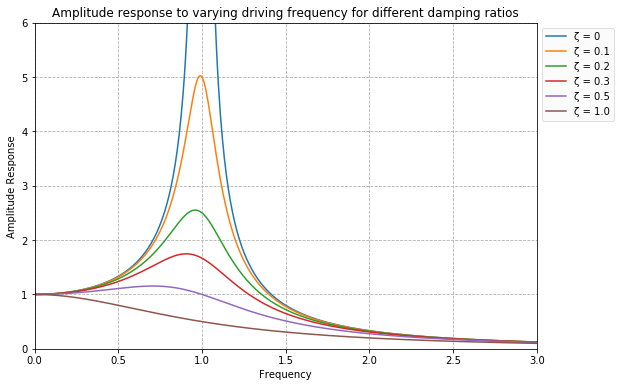

In [3]:
#Gridlines
plt.figure(figsize=(9,6))
plt.axis([0, 3, 0, 6])
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('Frequency')
plt.ylabel('Amplitude Response')
plt.title("Amplitude response to varying driving frequency for different damping ratios")

#Create the values to be plotted
w = np.linspace(0, 3, 501)

#Plot the data points
zeta_list = [0, 0.1, 0.2, 0.3, 0.5, 1.0]
for zeta in zeta_list:
    plot_name = '\u03B6 = ' + str(zeta)
    plt.plot(w, amplitude(w, zeta), label = plot_name)

#Legend
legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)
    
plt.show()

From the plot we can clearly see that as the damping ratio increases amplitude response becomes flatter for varying driving frequencies. This allows us to conclude that we may use damping to decrease the amplitude response at the resonant frequency, as seen for $\zeta = 0.5$, the amplitude response is fairly flat. Something of note for the plot is that when we vary $\omega_0$ we find that the resonant frequency shifts to be exactly $\omega_0$.

## Task 2 - Integrate the ODE with scipy.integrate.odeint and plot for varying driving frequencies and damping rates

In order to allow scipy.integrate.odeint to evaluate the differential equation, let us introduce an independent variable in order to turn the second order equation into two first order equations.

Define the system of equations $y = [x', x]$ and $y' = [x'', x']$

From Newtons second law we have
$$ \frac{d^2x}{dt^2} = \frac{F_0}{m}\sin(\omega t) - 2\zeta\omega_0\frac{dx}{dt} - \omega_0^2 x$$

so the system becomes

$$ y'[0] = \frac{F_0}{m}\sin(\omega t) - 2\zeta\omega_0\frac{dx}{dt} - \omega_0^2 x$$

$$ y'[1] = y[0] $$

In [4]:
def dy_dx(y, t, zeta, omega, omega_0 = 1.0, F_0 = -10.0, m = 1):
    return np.array((F_0*np.sin(omega*y[1])/m - 2*zeta*omega_0*y[0] - (omega_0**2)*y[1], y[0]))

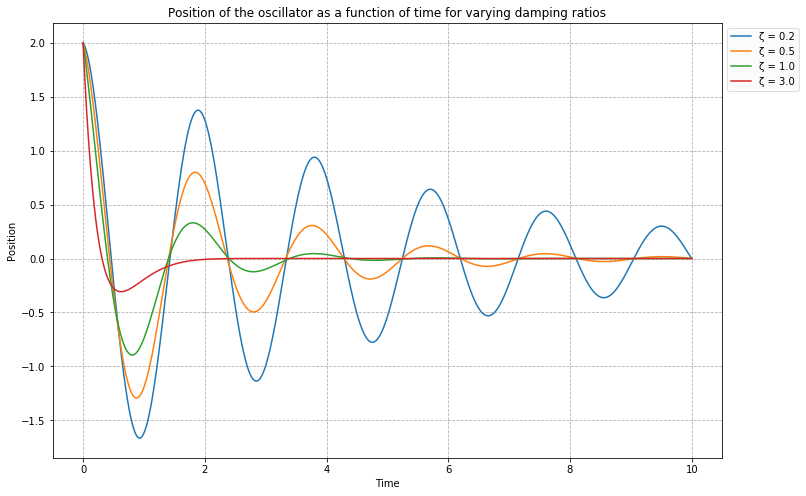

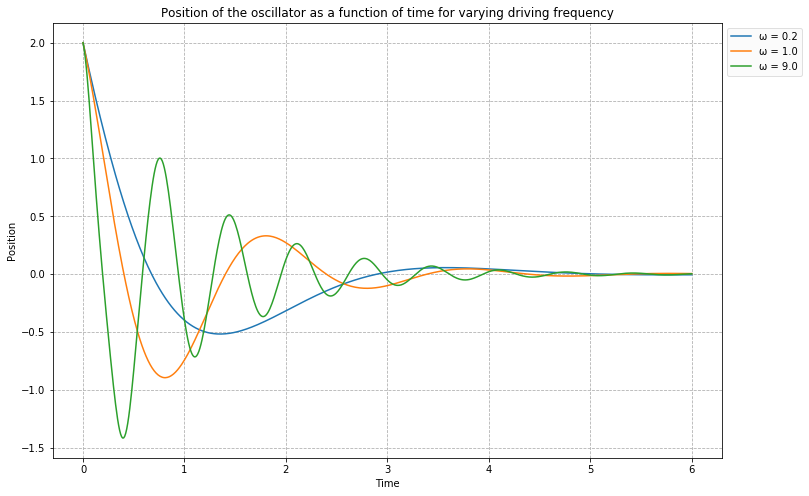

In [5]:
#Data
y0 = [2, 0] #Initial conditions - position and velocity
zeta_list = [0.2, 0.5, 1.0, 3.0]
omega_list = [0.2, 1.0, 9.0]

#Plot for varying damping rates at a constant driving frequency
#Create the domain
t = np.linspace(0, 10, 1000)

#Gridlines
plt.figure(figsize=(12,8))
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('Time')
plt.ylabel('Position')
plt.title("Position of the oscillator as a function of time for varying damping ratios")

#Plot the function
for zeta in zeta_list:
    w = 1.0 #Set constant driving frequency
    plot_name = '\u03B6 = ' + str(zeta)
    y = odeint(dy_dx, y0, t, args = (zeta, w))[:,0]
    plt.plot(t, y, label = plot_name)

#Legend
legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()

#Plot for varying driving frequency at a constant damping rate
#Create the domain
t = np.linspace(0, 6, 600)

#Gridlines
plt.figure(figsize=(12,8))
plt.grid(linestyle='dashed')
#Labels
plt.xlabel('Time')
plt.ylabel('Position')
plt.title("Position of the oscillator as a function of time for varying driving frequency")

#Plot the function
for omega in omega_list:
    z = 1.0 #Set constant damping rate
    plot_name = '\u03C9 = ' + str(omega)
    y = odeint(dy_dx, y0, t, args = (z, omega))[:,0]
    plt.plot(t, y, label = plot_name)

#Legend
legend = plt.legend(bbox_to_anchor=(1, 1), loc=2)
frame = legend.get_frame()
frame.set_facecolor('#f9f9f9')
frame.set_alpha(0.6)

plt.show()

Analytically, if we look at the equation for the amplitude in task 1, we expect that the larger the damping ratio, $\zeta$, the smaller the amplitude response and the larger the driving frequency, $\omega$, the greater the amplitude response. Looking at the steady-state solution given in the introduction we expect that varying the damping ratio has no effect on the period and increasing the driving decreases the period.

When we increase the damping force, we find that the period of oscillation remains the same, as shown by the time at which the oscillator crosses the $x = 0$ point. However the larger the damping force the smaller the amplitude of oscillation and the faster the oscillation decays to nothing as seen in the plot of $\zeta = 3$. This is consistent with the intuitive guess that the larger the damping of a harmonic oscillator, the faster the oscillation decays.

When we increase the driving frequency, we find that the period of oscillation grows smallers, as expected. The larger the driving frequency, the larger the amplitude of oscillation and the more oscillations occur before the oscillator damps out. This is also consistent with the intuitive guess since the driving force combats the damping force, the larger the driving force the less noticable the effects of the damping force. This is why we see opposite trends for increasing each the damping force and the driving force.

Therefore we find that using scipy.integrate.odeint yields a solution which follows expected results.

## Conclusion

In this assignment we explore the driven harmonic oscillator. We explore the amplitude response to the driving frequency for different damping ratios and find that the greater the damping force the smaller the amplitude of the oscillator. To follow this up we utilize scipy.integrate.odeint in order to find a solution to the differential equation resulting from Newtons second law, given in the introduction. We then use this solution and vary the damping force whilst keeping the driving force constant, then vary the driving force and keep the damping force constant. We find the results agree with our intuition and analytic expectations.